# Medical Cost Personal Dataset 

## Task

**The Requirements for this assessment:**

- based on the given dataset, identify stakeholders/audiences who could benefit from your study. Setup your goals together with relevant research questions and choose appropriate machine learning methods to achieve your goal. 

- Deliver your findings to your stakeholders/ audiences with critical insights.


**For each dataset:** 

- follow machine learning pipeline, after EDA and Preprocessing, select, train,apply, evaluate and present at least two models using different machine learning techniques.

- Describe and justify the selection of any appropriate hyper-parameters for each model. Compare the performances of the models. Along with the code cells (preferably with comments), you should use the appropriate markdown cells in the notebook to describe and justify your work.

- Novelty: Explore and innovate new method(s) that cannot be found in literature.

Based on your explorations across the three <span style="color: red; font-weight: bold;font-size: 12pt; text-decoration: underline"> ??</span> projects, reflect on the insights gained throughout
your learning journey. 

Consider how each dataset and the comparison of the three challenged
your understanding and forced you to think critically about data analysis, feature extraction, and
model performance. 

What new skills or concepts did you master that you previously found difficult
or confusing? 

Reflect on how this learning experience has deepened your knowledge, not just
technically, but also in terms of how you approach problem-solving. Think about how this process
has influenced your behaviour, perhaps making you more detail-oriented, patient, or the balance
between exploration and exploitation.

## What are the aims of this?

**The Requirements for this assessment:** 

    based on the given dataset, identify stakeholders/audiences who could benefit from your study. Setup your goals together with relevant research questions and choose appropriate machine learning methods to achieve your goal. Deliver your findings to your stakeholders/ audiences with critical insights.

- Predicting the charges that a patient may be expected to pay based upon 6 factors
    - Sex
    - Age
    - BMI
    - Children
    - Smoker
    - Region


### For each dataset

- Follow machine learning pipeline
    - EDA
    - Preprocessing
    - Select
    - Train (2 models)
    - Apply 
    - Evaluate
    - Present 

- Describe and justify the selection of any appropriate hyper-parameters for each model
- Compare the performance of both models
- Explore and innovate new methods that cannot be found in literature


## Stakeholders
- An insurance company that is creating a dynamic price plan that gives an accurate charge, 

    depending on certain factors that are asertained during the application

## Goals
- To be able to give certain factors and get a price based on these

## Research Questions
- What is the biggest impact on charge out of the variables given and why?

- *Is there a difference between bmi when it comes to men and women?*

BMI categories are the same for both men and women:
- Underweight: BMI < 18.5
- Normal weight: BMI 18.5 - 24.9
- Overweight: BMI 25 - 29.9
- Obesity: BMI 30 and above

Is there a way to encode these based on these categories?

## Imports


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import seaborn as sns

%matplotlib inline
import plotly.express as px
from rich import pretty, print

pretty.install()

In [2]:
colours = sns.color_palette("Set3")

## Load the dataset

In [3]:
data_filepath = "./Data/insurance-adapted.csv"
dataframe = pd.read_csv(data_filepath)
dataframe.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
5,NaN,female,25.740,0,no,southeast,3756.62160


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


/var/folders/xh/fvvnghrs13n5sqcsmprbn_c80000gn/T/ipykernel_94415/4074888093.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe, x="charges", palette=colours, bins=30, kde=True)


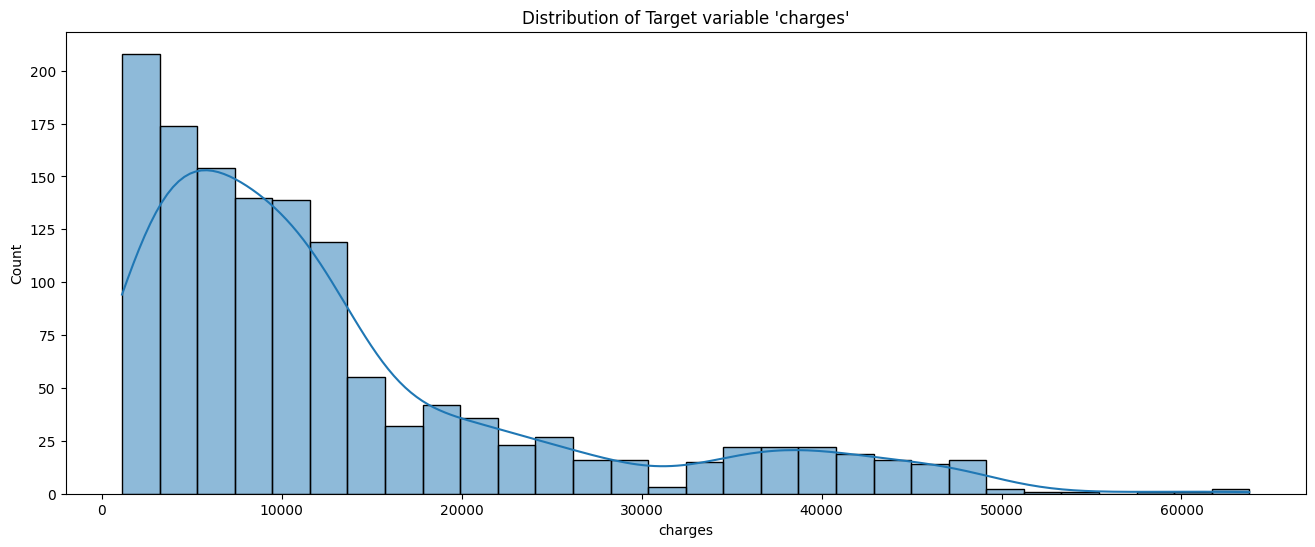

In [5]:
plt.figure(figsize=(16, 6))
sns.histplot(data=dataframe, x="charges", palette=colours, bins=30, kde=True)
plt.title("Distribution of Target variable 'charges'")
plt.show()

In [6]:
null_vals = dataframe.isnull().sum()
print(null_vals)

age         20
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64

In [7]:
na_vals = dataframe.isna().sum()
print(na_vals)

age         20
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64

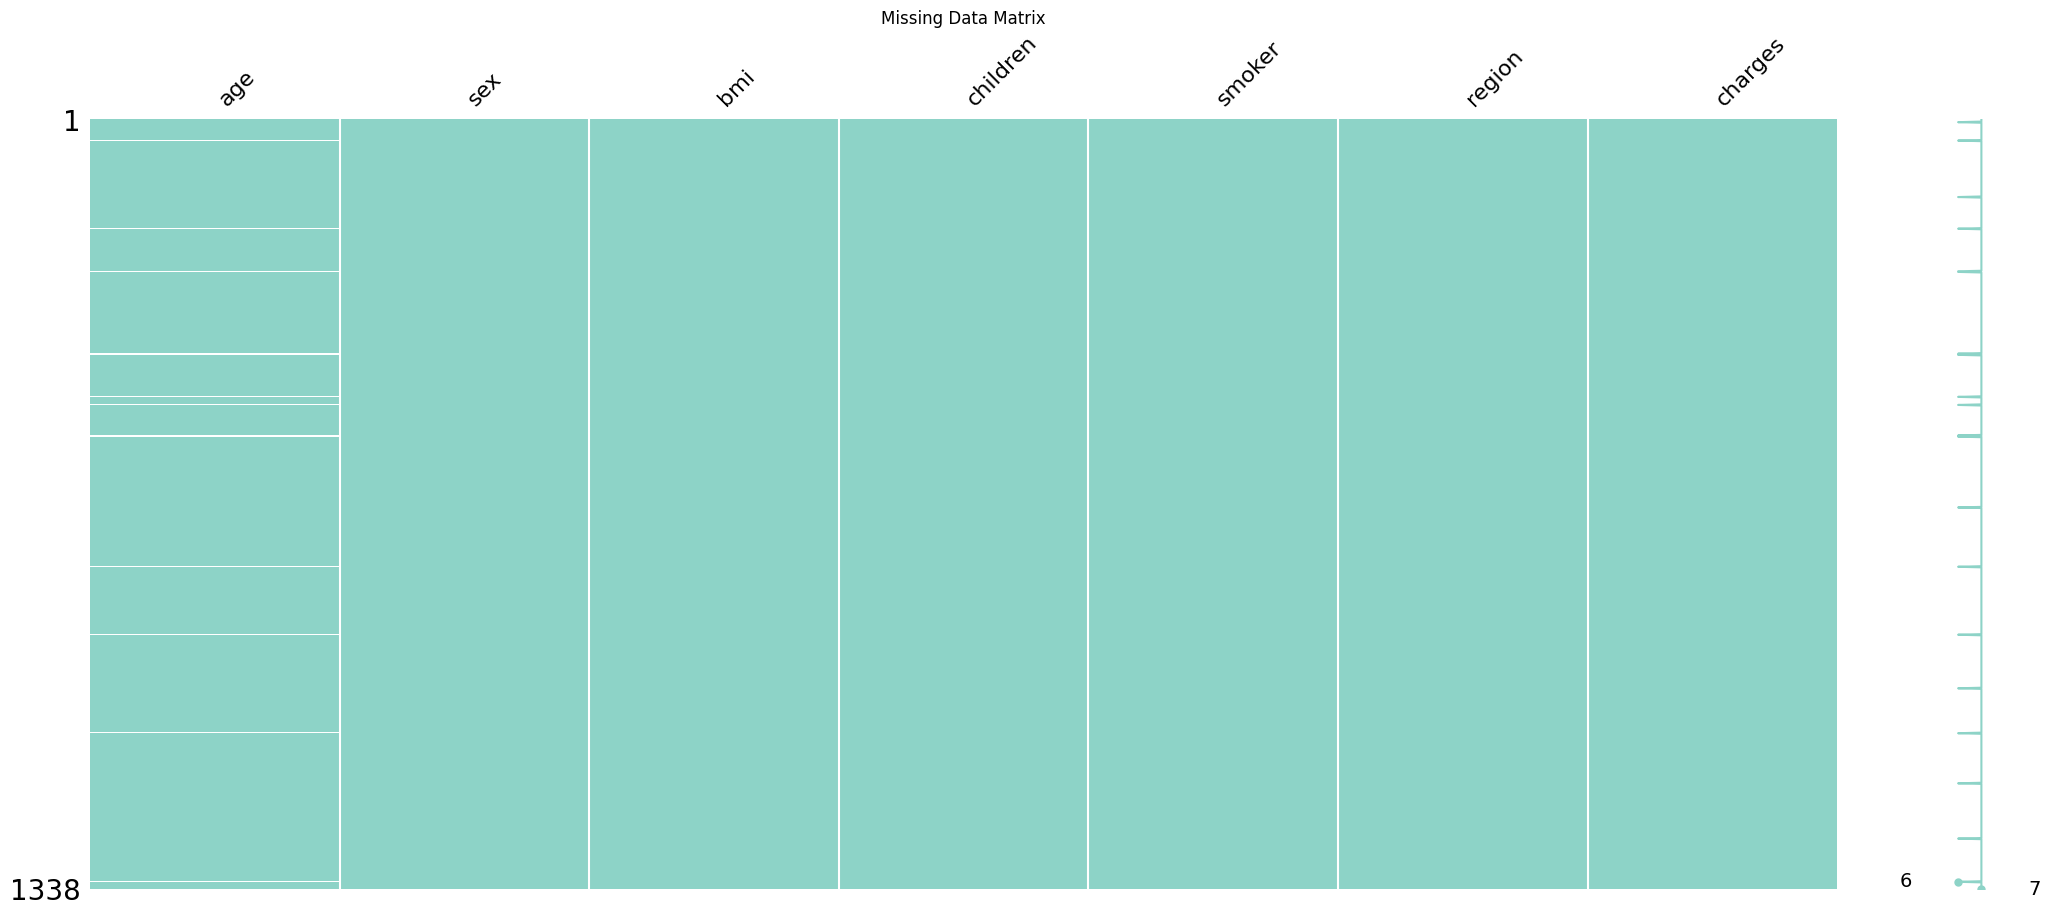

In [8]:
import missingno as msno

msno.matrix(dataframe, color=colours[0])
plt.title("Missing Data Matrix")
plt.axis()
plt.show()

## Missing data:

- 20 values missing in the age feature, how are we going to handle this?

In [9]:
dataframe.describe()

,age,bmi,children,charges
count,1318.000000,1338.000000,1338.000000,1338.000000
mean,39.216237,30.663397,1.094918,13270.422265
std,14.083151,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Distribution of numeric features

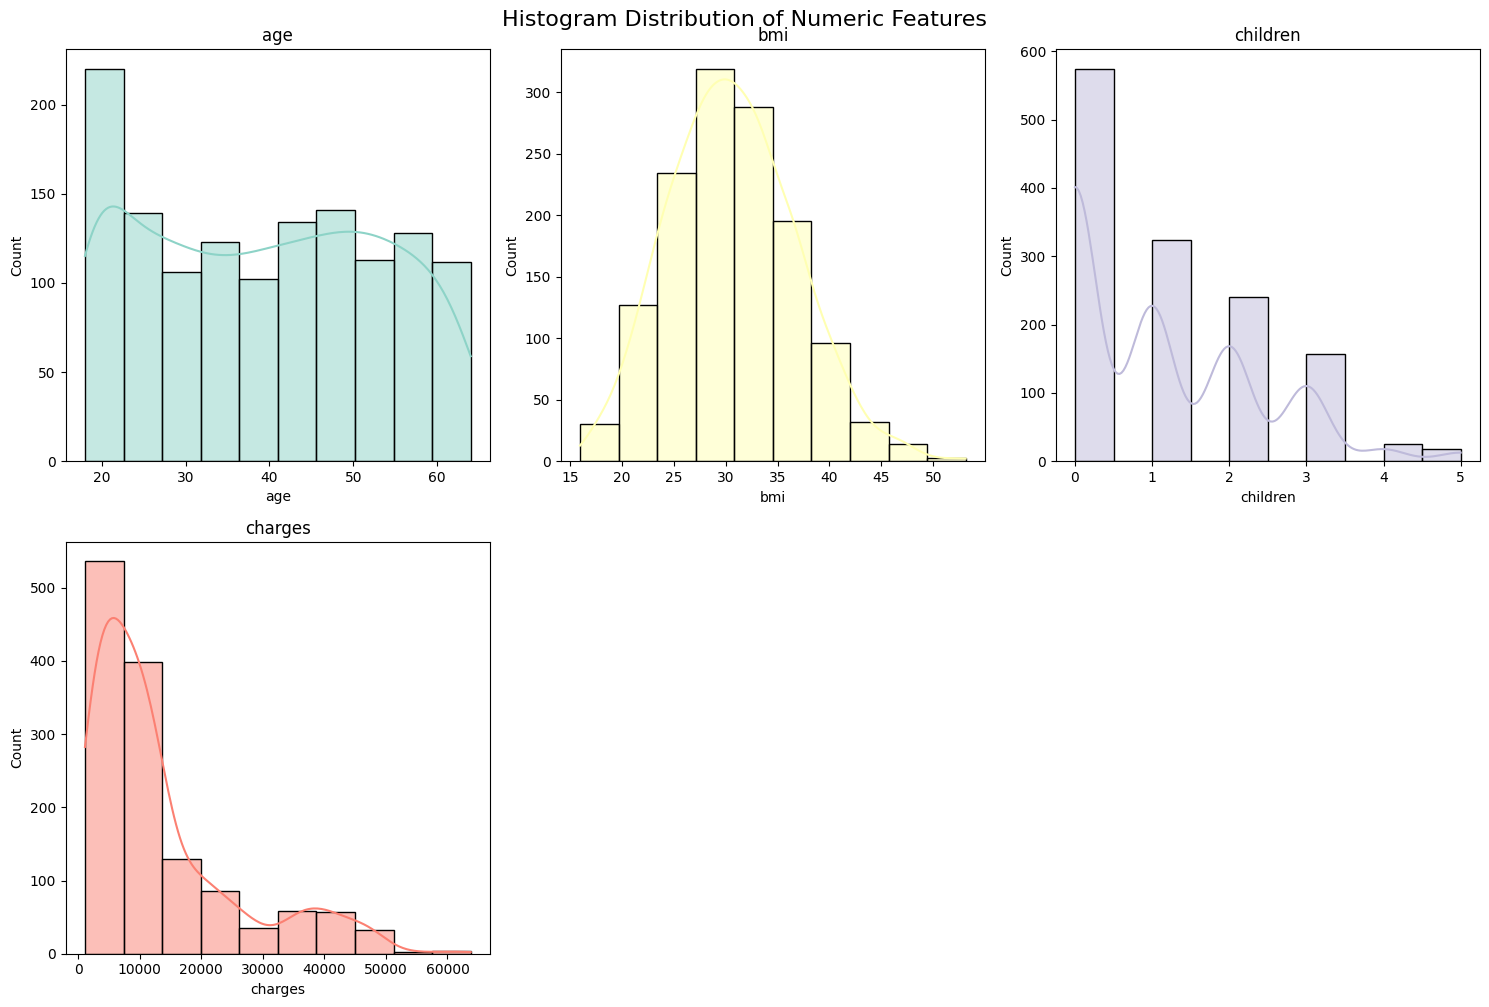

In [10]:
numeric_cols = dataframe.select_dtypes(include="number").columns

num_cols = len(numeric_cols)
nrows = (num_cols + 2) // 3


plt.figure(figsize=(15, 5 * nrows))
for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, 3, i + 1)
    sns.histplot(dataframe[col], color=colours[i], bins=10, kde=True)
    plt.title(col)

plt.tight_layout()
plt.suptitle("Histogram Distribution of Numeric Features", fontsize=16, y=1.002)
plt.show()

## Object columns

Visualise using countplots

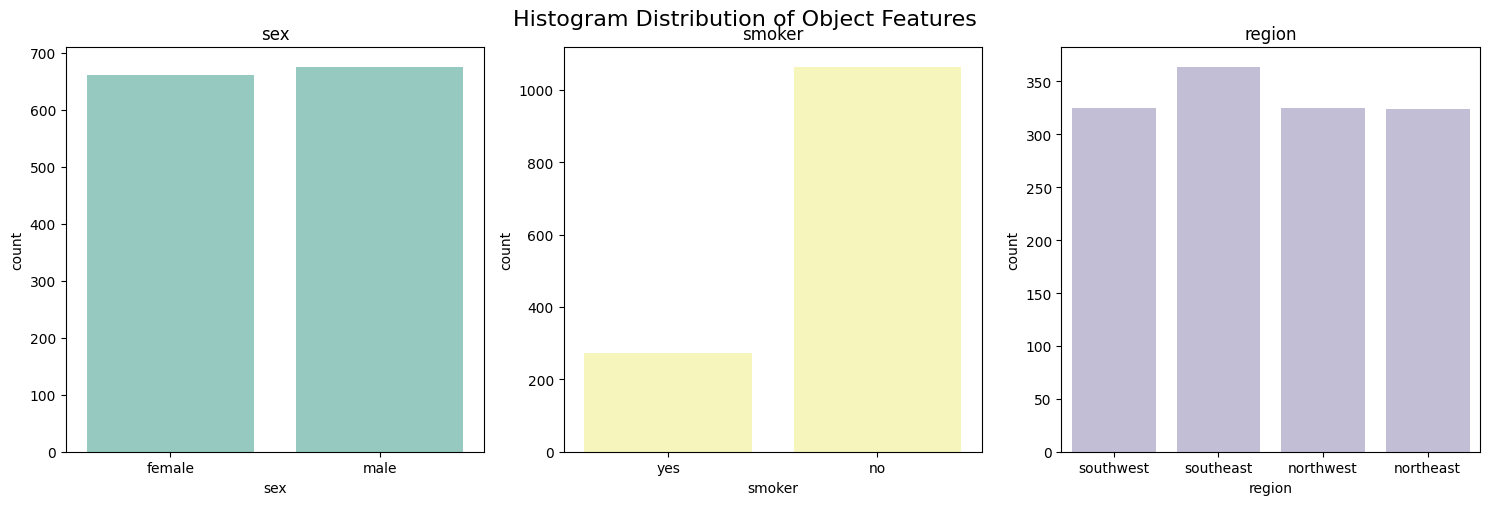

In [11]:
object_cols = dataframe.select_dtypes(include="object").columns

num_cols = len(object_cols)
nrows = (num_cols + 2) // 3


colours = sns.color_palette("Set3", num_cols)

plt.figure(figsize=(15, 5 * nrows))
for i, col in enumerate(object_cols):
    plt.subplot(nrows, 3, i + 1)
    sns.countplot(x=dataframe[col], color=colours[i])
    plt.title(col)

plt.tight_layout()
plt.suptitle("Histogram Distribution of Object Features", fontsize=16, y=1.002)
plt.show()

## Any outliers?


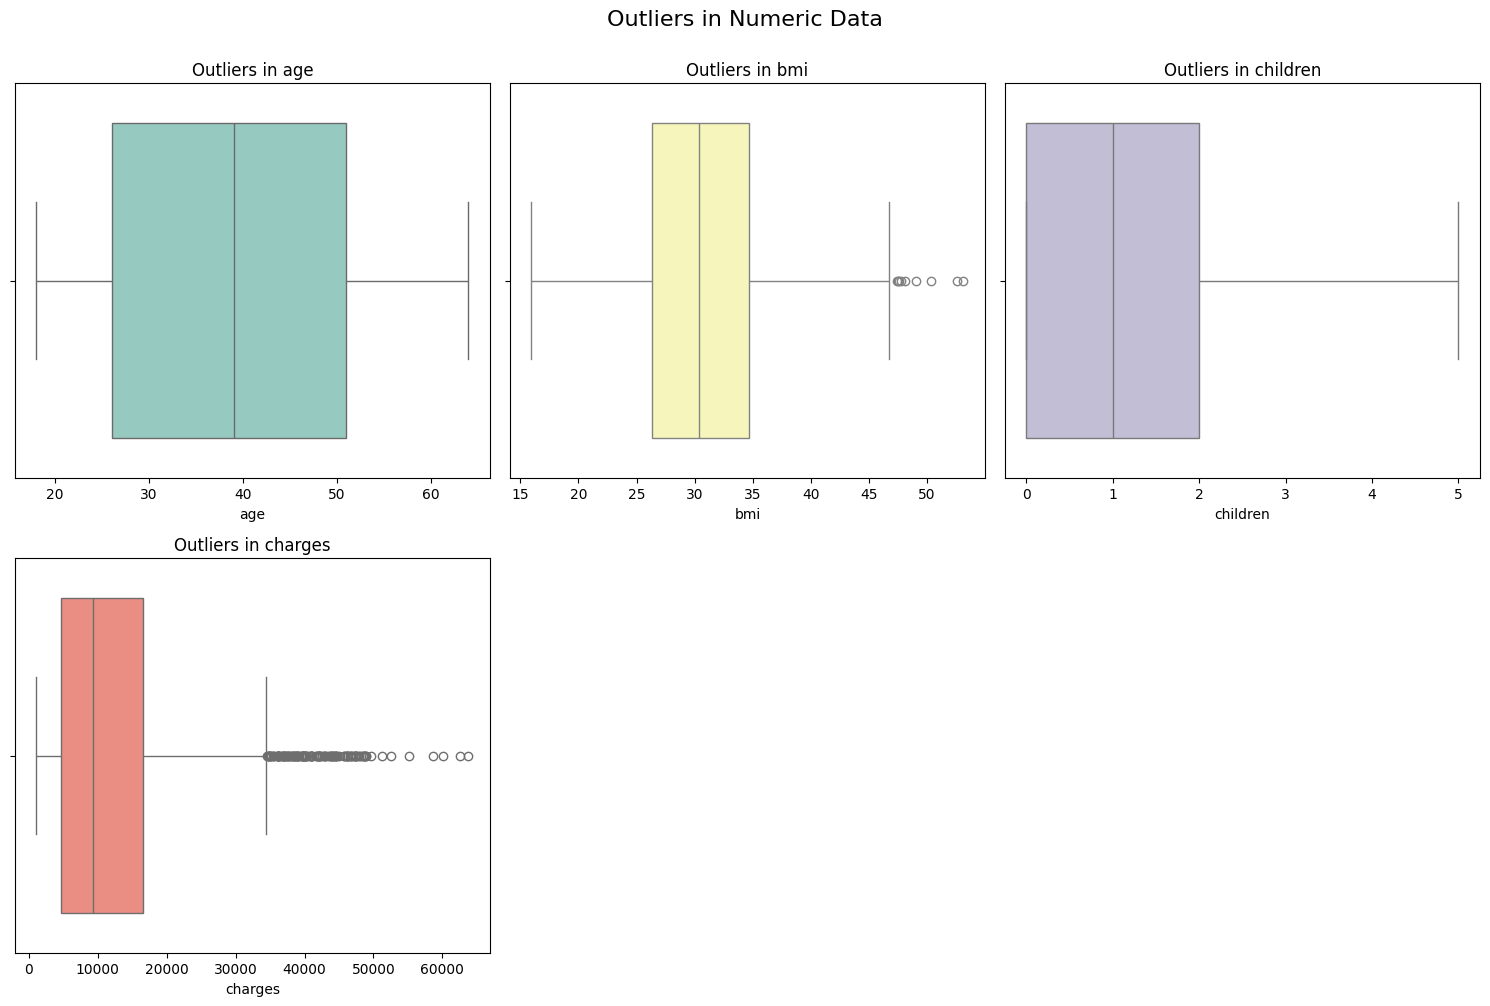

In [12]:
numeric_cols = dataframe.select_dtypes(include="number").columns

num_cols = len(numeric_cols)
nrows = (num_cols + 2) // 3
colours = sns.color_palette("Set3", num_cols)

plt.figure(figsize=(15, 5 * nrows))
for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, 3, i + 1)  # Create subplot
    sns.boxplot(x=dataframe[col], color=colours[i])
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)

plt.suptitle("Outliers in Numeric Data", fontsize=16, y=1.002)
plt.tight_layout()
plt.show()

## Correlation of features

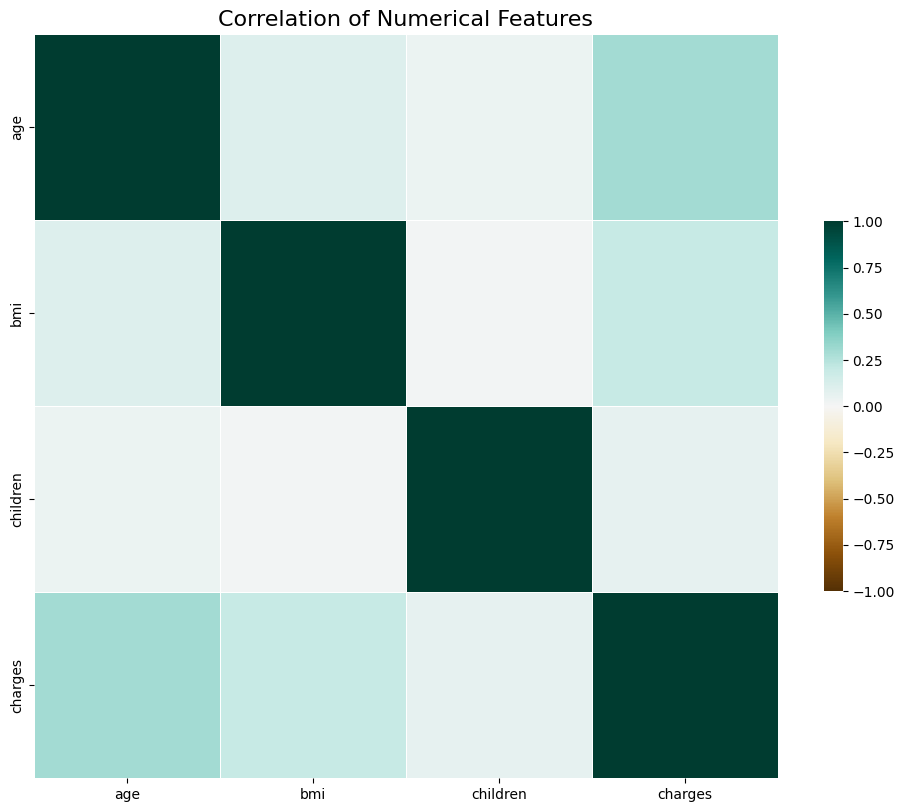

In [13]:
plt.figure(figsize=(12, 12))
corr = dataframe.corr(numeric_only=True)
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.4},
    cmap="BrBG",
)
ax.set(xlabel="", ylabel="")
plt.title("Correlation of Numerical Features", fontsize=16)
plt.show()

## Preprocessing

### Deal with missing values

- As the age is an important factor as shown in the correlation matrix, and the dataset is small the rows cannot just be dropped
- The best way to impute the values could be though working out what the age for these rows should be based on other data 

In [14]:
missing_age_rows = dataframe[dataframe["age"].isnull()]
print(missing_age_rows)

age     sex     bmi  children smoker     region      charges
5     NaN  female  25.740         0     no  southeast   3756.62160
37    NaN    male  20.800         0     no  southwest   2302.30000
135   NaN  female  28.050         0     no  southeast   2155.68150
190   NaN    male  31.570         0     no  southeast  12557.60530
264   NaN  female  38.060         3     no  southeast  20462.99766
265   NaN    male  42.350         3    yes  southeast  46151.12450
407   NaN  female  23.600         1     no  southwest   8539.67100
409   NaN    male  30.030         1     no  southeast   4074.45370
482   NaN  female  31.350         0     no  southeast   1622.18850
496   NaN  female  23.600         2     no  southwest   4931.64700
549   NaN  female  46.200         0    yes  southeast  45863.20500
551   NaN  female  28.930         0     no  southeast   3972.92470
674   NaN  female  43.890         2    yes  southeast  46200.98510
777   NaN    male  39.805         0     no  northeast   7448.40395
895   NaN  female  44.000         0     no  southwest  13063.88300
988   NaN    male  34.675         0     no  northeast   4518.82625
1066  NaN    male  37.290         2     no  southeast   8978.18510
1153  NaN  female  35.815         1     no  northwest   5630.45785
1249  NaN    male  33.630         1    yes  northeast  37607.52770
1324  NaN    male  25.935         1     no  northwest   4239.89265

In [15]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
dataframe[["age"]] = imputer.fit_transform(dataframe[["age"]])

# Check to make sure there are no missing values now after imputing the ages
missing_age_rows = dataframe[dataframe["age"].isnull()]
print(missing_age_rows)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

In [16]:
dataframe.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19.000000,female,27.900,0,yes,southwest,16884.92400
1,18.000000,male,33.770,1,no,southeast,1725.55230
2,28.000000,male,33.000,3,no,southeast,4449.46200
3,33.000000,male,22.705,0,no,northwest,21984.47061
4,32.000000,male,28.880,0,no,northwest,3866.85520
5,39.216237,female,25.740,0,no,southeast,3756.62160


### Encode the categorical variables

#### Feature engineering

#!Will Try this after initial basleine with original data

- Create column for bmi category 

BMI categories:

- Underweight: BMI < 18.5
- Normal weight: BMI 18.5 - 24.9
- Overweight: BMI 25 - 29.9
- Obesity: BMI 30 and above

In [17]:
# Define BMI categories
bins = [0, 18.5, 24.9, 29.9, float("inf")]  # Define the edges of the bins
labels = [
    "Underweight",
    "Normal weight",
    "Overweight",
    "Obesity",
]  # Labels for each range

# Create a new 'bmi_category' column based on the defined ranges
dataframe["bmi_category"] = pd.cut(dataframe["bmi"], bins=bins, labels=labels)

dataframe.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19.0,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18.0,male,33.770,1,no,southeast,1725.55230,Obesity
2,28.0,male,33.000,3,no,southeast,4449.46200,Obesity
3,33.0,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32.0,male,28.880,0,no,northwest,3866.85520,Overweight


In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           1338 non-null   float64 
 1   sex           1338 non-null   object  
 2   bmi           1338 non-null   float64 
 3   children      1338 non-null   int64   
 4   smoker        1338 non-null   object  
 5   region        1338 non-null   object  
 6   charges       1338 non-null   float64 
 7   bmi_category  1338 non-null   category
dtypes: category(1), float64(3), int64(1), object(3)
memory usage: 74.8+ KB


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

object_cols = dataframe.select_dtypes(include="object").columns
category_cols = dataframe.select_dtypes(include="category").columns
object_cols = object_cols.append(category_cols)

print(object_cols)

preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(),
            object_cols,
        )  # One-hot encoding for categorical columns
    ],
    remainder="passthrough",
)

encoded_df = preprocessor.fit_transform(dataframe)
encoded_df = pd.DataFrame(encoded_df, columns=preprocessor.get_feature_names_out())
encoded_df.head()

Index(['sex', 'smoker', 'region', 'bmi_category'], dtype='object')

,cat__sex_female,cat__sex_male,cat__smoker_no,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest,cat__bmi_category_Normal weight,cat__bmi_category_Obesity,cat__bmi_category_Overweight,cat__bmi_category_Underweight,remainder__age,remainder__bmi,remainder__children,remainder__charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,28.880,0.0,3866.85520


### Create Training and test datasets

## Traing and testing models

## Split the data

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate features (X) and target (y)
X = encoded_df.drop(columns=["remainder__charges"])
y = encoded_df["remainder__charges"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# scale the data
s_Scaler = StandardScaler()
m_mScaler = MinMaxScaler()

X_train = m_mScaler.fit_transform(X_train)
X_test = m_mScaler.fit_transform(X_test)

## Training function


In [21]:
# Create a function to fit and train models and show the predictions
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error


def fit_and_predict(X_train, X_test, y_train, y_test, model):
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2s = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    print("Model: {}".format(model.__class__))
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"r2 score: {r2s}")
    return predictions, r2s, model

### Example of a model

In [22]:
preds, mse, trained_model_1 = fit_and_predict(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    model=LinearRegression(),
)

Model: <class 'sklearn.linear_model._base.LinearRegression'>

Mean Squared Error: 33979925.387922026

Mean Absolute Error: 4297.854583018657

r2 score: 0.7811259063992894

In [23]:
"""plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()"""

"plt.figure(figsize=(8, 6))\nsns.scatterplot(x=y_test, y=preds)\nplt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction\nplt.xlabel('Actual Values')\nplt.ylabel('Predicted Values')\nplt.title('Actual vs Predicted')\nplt.show()"

## Trying different models without hyperparameter tuning

In [24]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

results_dict = {}


# Have hyperparameter tuned
dtr = DecisionTreeRegressor(
    criterion="absolute_error",
    max_depth=5,
    max_features=None,
    max_leaf_nodes=None,
    min_samples_leaf=5,
    min_samples_split=2,
)
xgr = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    n_estimators=300,
    subsample=0.8,
)
xgr_optunaed = XGBRegressor(
    learning_rate=0.02320542296870936,
    max_depth=2,
    min_child_weight=4,
    n_estimators=325,
    subsample=0.7696763482800417,
    colsample_bytree=0.6624305100711059,
    gamma=1.0734011514931848e-08,
    reg_alpha=1.0811494165849225,
    reg_lambda=1.2373677652130754e-07,
)

# Need to hyperparameter tune
lr = LinearRegression()
rfr = RandomForestRegressor()
lgb = LGBMRegressor()
cbr = CatBoostRegressor(loss_function="RMSE", verbose=100)

models = [lr, rfr, dtr, xgr, xgr_optunaed, cbr, lgb]

for mod in models:
    preds, r2_result, mod_t = fit_and_predict(X_train, X_test, y_train, y_test, mod)
    results_dict[str(mod_t.__class__)] = r2_result

# Sort the results so the best is first (based on r2 score)
results_dict = dict(
    sorted(results_dict.items(), key=lambda item: item[1], reverse=True)
)
print("Model Results: ")
print(results_dict, "\n")

Model: <class 'sklearn.linear_model._base.LinearRegression'>

Mean Squared Error: 33979925.387922026

Mean Absolute Error: 4297.854583018657

r2 score: 0.7811259063992894

Model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>

Mean Squared Error: 21183918.048057593

Mean Absolute Error: 2603.170119402547

r2 score: 0.8635485272922818

Model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>

Mean Squared Error: 19997201.444017548

Mean Absolute Error: 1873.2556318059703

r2 score: 0.8711924970216122

Model: <class 'xgboost.sklearn.XGBRegressor'>

Mean Squared Error: 18954263.89245019

Mean Absolute Error: 2622.391396009853

r2 score: 0.8779103461244412

Model: <class 'xgboost.sklearn.XGBRegressor'>

Mean Squared Error: 18137512.024078004

Mean Absolute Error: 2417.43280283413

r2 score: 0.8831712707099375

Learning rate set to 0.041383
0:	learn: 11661.8006203	total: 473us	remaining: 473ms
100:	learn: 4267.6928606	total: 41.9ms	remaining: 373ms
200:	learn: 3934.9658291	total: 79.2ms	remaining: 315ms
300:	learn: 3739.5458362	total: 115ms	remaining: 268ms
400:	learn: 3537.9254508	total: 152ms	remaining: 227ms
500:	learn: 3375.2870325	total: 189ms	remaining: 188ms
600:	learn: 3228.4310990	total: 228ms	remaining: 152ms
700:	learn: 3091.5087649	total: 264ms	remaining: 113ms
800:	learn: 2970.2992474	total: 301ms	remaining: 74.9ms
900:	learn: 2836.5268383	total: 339ms	remaining: 37.2ms
999:	learn: 2713.1101791	total: 378ms	remaining: 0us


Model: <class 'catboost.core.CatBoostRegressor'>

Mean Squared Error: 21392004.894500893

Mean Absolute Error: 2608.319888045272

r2 score: 0.8622081823861186

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 14
[LightGBM] [Info] Start training from score 13346.089733


Model: <class 'lightgbm.sklearn.LGBMRegressor'>

Mean Squared Error: 20205774.025244117

Mean Absolute Error: 2579.672817617155

r2 score: 0.8698490233634224

Model Results:

{
    "<class 'xgboost.sklearn.XGBRegressor'>": 0.8831712707099375,
    "<class 'sklearn.tree._classes.DecisionTreeRegressor'>": 0.8711924970216122,
    "<class 'lightgbm.sklearn.LGBMRegressor'>": 0.8698490233634224,
    "<class 'sklearn.ensemble._forest.RandomForestRegressor'>": 0.8635485272922818,
    "<class 'catboost.core.CatBoostRegressor'>": 0.8622081823861186,
    "<class 'sklearn.linear_model._base.LinearRegression'>": 0.7811259063992894
}

## Hyperparameter Tuning

### XGBoost Gridsearch CV

In [26]:
from sklearn.model_selection import GridSearchCV

"""
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
 
# Create an XGBoost model
xgb_model = XGBRegressor()
 
# Perform GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
 
# Get the best hyperparameters
best_params = grid_search.best_params_
 
# Fit the model with the best hyperparameters on the entire dataset
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
 
# Evaluate the best model on the test set
r2 = best_model.score(X_test, y_test)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on test set: {r2:.2f}")"""

'\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'max_depth\': [3, 4, 5],\n    \'min_child_weight\': [1, 3, 5],\n    \'subsample\': [0.8, 0.9, 1.0],\n    \'colsample_bytree\': [0.8, 0.9, 1.0]\n}\n \n# Create an XGBoost model\nxgb_model = XGBRegressor()\n \n# Perform GridSearchCV\ngrid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring=\'r2\')\ngrid_search.fit(X_train, y_train)\n \n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n \n# Fit the model with the best hyperparameters on the entire dataset\nbest_model = grid_search.best_estimator_\nbest_model.fit(X_train, y_train)\n \n# Evaluate the best model on the test set\nr2 = best_model.score(X_test, y_test)\nprint(f"Best Hyperparameters: {best_params}")\nprint(f"Accuracy on test set: {r2:.2f}")'

### XGB regressor gave a good r2 score after hyperparameter tuning, can it be better?

- Previous score: 0.8779103461244412
- Optuna tuned: 0.8831712707099375

Yes! A small increase!

### Hyperparameter tuning with optuna 

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score


def objective(trial):

    params = {
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.05),
        "max_depth": trial.suggest_int("max_depth", 2, 6),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="r2")
    return score.mean()


# Run the optimization
study = optuna.create_study(
    direction="maximize", storage="sqlite:///XGBR_study.db", study_name="XGBR_study"
)  # Create thw  study and save to a db
study.optimize(objective, n_trials=50)

# Best parameters
print(study.best_params)
print(study.best_trial)

[I 2024-11-20 18:45:02,945] A new study created in RDB with name: XGBR_study
/var/folders/xh/fvvnghrs13n5sqcsmprbn_c80000gn/T/ipykernel_94415/2153949471.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.05),
/var/folders/xh/fvvnghrs13n5sqcsmprbn_c80000gn/T/ipykernel_94415/2153949471.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/var/folders/xh/fvvnghrs13n5sqcsmprbn_c80000gn/T/ipykernel_94415/2153949471.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases

{
    'learning_rate': 0.03455758105995407,
    'max_depth': 2,
    'min_child_weight': 8,
    'n_estimators': 240,
    'subsample': 0.7114841909067261,
    'colsample_bytree': 0.7745881347153389,
    'gamma': 3.896183784253244e-05,
    'reg_alpha': 1.2965542957936085e-07,
    'reg_lambda': 5.094859878221357e-07
}

FrozenTrial(number=41, state=1, values=[0.8530459514491904], datetime_start=datetime.datetime(2024, 11, 20, 18, 45,
26, 894623), datetime_complete=datetime.datetime(2024, 11, 20, 18, 45, 27, 248920), params={'learning_rate': 
0.03455758105995407, 'max_depth': 2, 'min_child_weight': 8, 'n_estimators': 240, 'subsample': 0.7114841909067261, 
'colsample_bytree': 0.7745881347153389, 'gamma': 3.896183784253244e-05, 'reg_alpha': 1.2965542957936085e-07, 
'reg_lambda': 5.094859878221357e-07}, user_attrs={}, system_attrs={}, intermediate_values={}, 
distributions={'learning_rate': FloatDistribution(high=0.05, log=True, low=0.005, step=None), 'max_depth': 
IntDistribution(high=6, log=False, low=2, step=1), 'min_child_weight': IntDistribution(high=10, log=False, low=1, 
step=1), 'n_estimators': IntDistribution(high=500, log=False, low=100, step=1), 'subsample': 
FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, 
log=False, low=0.6, step=None), 'gamma': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'reg_alpha': 
FloatDistribution(high=10.0, log=True, low=1e-08, step=None), 'reg_lambda': FloatDistribution(high=10.0, log=True, 
low=1e-08, step=None)}, trial_id=42, value=None)

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 
'n_estimators': 300, 'subsample': 0.8}

### Decision tree regressor Gridsearch CV

In [ ]:
"""param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}
# Create an XGBoost model
dtr_model = DecisionTreeRegressor()
 
# Perform GridSearchCV
grid_search = GridSearchCV(dtr_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
 
# Get the best hyperparameters
best_params = grid_search.best_params_
 
# Fit the model with the best hyperparameters on the entire dataset
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
 
# Evaluate the best model on the test set
r2 = best_model.score(X_test, y_test)
print(f"Best Hyperparameters: {best_params}")
print(f"R2 on test set: {r2:.2f}")"""

### LGBMRegressor Gridsearch CV

In [ ]:
"""param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10, -1],
    'num_leaves': [15, 31, 63, 127],
    'min_child_samples': [10, 20, 50, 100],
    'min_child_weight': [1e-5, 1e-3, 1e-2, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [0, 0.1, 1, 10],
}
 
# Create an XGBoost model
lgb_model = LGBMRegressor()
 
# Perform GridSearchCV
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
 
# Get the best hyperparameters
best_params = grid_search.best_params_
 
# Fit the model with the best hyperparameters on the entire dataset
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
 
# Evaluate the best model on the test set
r2 = best_model.score(X_test, y_test)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on test set: {r2:.2f}")"""